<h1>Lineal model<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цикл-обучения" data-toc-modified-id="Цикл-обучения-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цикл обучения</a></span></li><li><span><a href="#Нормализация-входных-параметров" data-toc-modified-id="Нормализация-входных-параметров-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Нормализация входных параметров</a></span></li><li><span><a href="#Использование-autograd" data-toc-modified-id="Использование-autograd-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Использование autograd</a></span></li><li><span><a href="#Оптимизатор-на-основе-градиентного-спуска" data-toc-modified-id="Оптимизатор-на-основе-градиентного-спуска-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Оптимизатор на основе градиентного спуска</a></span></li><li><span><a href="#Разбиение-набора-данных" data-toc-modified-id="Разбиение-набора-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Разбиение набора данных</a></span></li><li><span><a href="#Упражнение" data-toc-modified-id="Упражнение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Упражнение</a></span></li></ul></div>

In [12]:
import torch
from matplotlib import pyplot as plt

In [54]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, 4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [55]:
t_c = torch.tensor(t_c) # температура в градусах по цельсию
t_u = torch.tensor(t_u) # температура в неизвестных величинах

In [13]:
def model(t_u, w, b):
    return w * t_u + b

In [15]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [16]:
w = torch.ones(())
b = torch.zeros(())

In [17]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [19]:
loss = loss_fn(t_p, t_c)
loss

tensor(1732.1757)

In [24]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)

In [25]:
a

tensor([[[1.]],

        [[1.]]])

In [27]:
print(f'shapes: x: {x.shape}, y: {y.shape}')

shapes: x: torch.Size([]), y: torch.Size([3, 1])


In [28]:
print(f'z: {z.shape}, a: {a.shape}')

z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])


In [29]:
print('x * y:', (x * y).shape)

x * y: torch.Size([3, 1])


In [30]:
print('y * z:', (y * z).shape)

y * z: torch.Size([3, 3])


In [31]:
print('y * z * a:', (y * z * a).shape)

y * z * a: torch.Size([2, 3, 3])


In [32]:
y * z * a

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [33]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [34]:
loss_rate_of_change_w

tensor(4485.5889)

In [36]:
learning_rate = 1e-2

In [37]:
learning_rate * loss_rate_of_change_w

tensor(44.8559)

In [38]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [39]:
w

tensor(-43.8559)

In [40]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [41]:
loss_rate_of_change_b

tensor(-4570.)

In [42]:
b = b - learning_rate * loss_rate_of_change_b

In [43]:
b

tensor(45.7000)

In [44]:
t_p.size(0)

11

In [46]:
# производная функции потерь
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [47]:
def dmodel_dw(t_u, w, b):
    return t_u

In [48]:
def dmodel_db(t_u, w, b):
    return 1.0

In [50]:
# обратный проход
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

### Цикл обучения

In [66]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b) # прямой проход 
        loss = loss_fn(t_p, t_c) 
        grad = grad_fn(t_u, t_c, t_p, w, b) # обратный проход
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print('Params:', params)
        print('Grad:  ', grad)
    return params

In [67]:
training_loop(n_epochs = 10,
              learning_rate = 1e-2,
              params = torch.tensor([1.0, 0.0]),
              t_u = t_u,
              t_c = t_c)

Epoch 1, Loss 1732.175659
Params: tensor([-43.8559,  -0.8115])
Grad:   tensor([4485.5874,   81.1455])
Epoch 2, Loss 5721265.000000
Params: tensor([2550.3701,   44.8640])
Grad:   tensor([-259422.6094,   -4567.5464])
Epoch 3, Loss 19136387072.000000
Params: tensor([-147484.6094,   -2597.9922])
Grad:   tensor([15003499.0000,   264285.6250])
Epoch 4, Loss 64007297826816.000000
Params: tensor([8529670.0000,  150248.2188])
Grad:   tensor([-8.6772e+08, -1.5285e+07])
Epoch 5, Loss 214091389422534656.000000
Params: tensor([-4.9331e+08, -8.6895e+06])
Grad:   tensor([5.0184e+10, 8.8397e+08])
Epoch 6, Loss 716091973631534432256.000000
Params: tensor([2.8530e+10, 5.0255e+08])
Grad:   tensor([-2.9023e+12, -5.1124e+10])
Epoch 7, Loss 2395181887799361993179136.000000
Params: tensor([-1.6500e+12, -2.9065e+10])
Grad:   tensor([1.6785e+14, 2.9567e+12])
Epoch 8, Loss 8011396158788023201191428096.000000
Params: tensor([9.5427e+13, 1.6809e+12])
Grad:   tensor([-9.7077e+15, -1.7100e+14])
Epoch 9, Loss 267964

tensor([3.1918e+17, 5.6224e+15])

In [68]:
training_loop(n_epochs = 10,
              learning_rate = 1e-4,
              params = torch.tensor([1.0, 0.0]),
              t_u = t_u,
              t_c = t_c)

Epoch 1, Loss 1732.175659
Params: tensor([ 0.5514, -0.0081])
Grad:   tensor([4485.5874,   81.1455])
Epoch 2, Loss 311.548065
Params: tensor([ 0.3668, -0.0116])
Grad:   tensor([1846.5056,   34.6586])
Epoch 3, Loss 70.804909
Params: tensor([ 0.2908, -0.0131])
Grad:   tensor([760.1066,  15.5218])
Epoch 4, Loss 30.007658
Params: tensor([ 0.2595, -0.0139])
Grad:   tensor([312.8818,   7.6440])
Epoch 5, Loss 23.093687
Params: tensor([ 0.2466, -0.0143])
Grad:   tensor([128.7781,   4.4010])
Epoch 6, Loss 21.921654
Params: tensor([ 0.2413, -0.0146])
Grad:   tensor([52.9904,  3.0660])
Epoch 7, Loss 21.722664
Params: tensor([ 0.2391, -0.0149])
Grad:   tensor([21.7918,  2.5164])
Epoch 8, Loss 21.688560
Params: tensor([ 0.2382, -0.0151])
Grad:   tensor([8.9488, 2.2901])
Epoch 9, Loss 21.682405
Params: tensor([ 0.2379, -0.0153])
Grad:   tensor([3.6617, 2.1970])
Epoch 10, Loss 21.680990
Params: tensor([ 0.2377, -0.0156])
Grad:   tensor([1.4853, 2.1586])


tensor([ 0.2377, -0.0156])

### Нормализация входных параметров

In [69]:
t_un = t_u * 0.1

In [70]:
training_loop(n_epochs = 10,
              learning_rate = 1e-2,
              params = torch.tensor([1.0, 0.0]),
              t_u = t_un,
              t_c = t_c)

Epoch 1, Loss 77.193428
Params: tensor([1.8078, 0.1209])
Grad:   tensor([-80.7850, -12.0945])
Epoch 2, Loss 30.687700
Params: tensor([2.1280, 0.1558])
Grad:   tensor([-32.0175,  -3.4833])
Epoch 3, Loss 23.446587
Params: tensor([2.2563, 0.1567])
Grad:   tensor([-12.8252,  -0.0967])
Epoch 4, Loss 22.286634
Params: tensor([2.3090, 0.1444])
Grad:   tensor([-5.2719,  1.2340])
Epoch 5, Loss 22.068619
Params: tensor([2.3320, 0.1269])
Grad:   tensor([-2.2990,  1.7555])
Epoch 6, Loss 21.996622
Params: tensor([2.3433, 0.1073])
Grad:   tensor([-1.1287,  1.9585])
Epoch 7, Loss 21.947363
Params: tensor([2.3500, 0.0869])
Grad:   tensor([-0.6678,  2.0363])
Epoch 8, Loss 21.901756
Params: tensor([2.3548, 0.0663])
Grad:   tensor([-0.4860,  2.0648])
Epoch 9, Loss 21.856840
Params: tensor([2.3590, 0.0455])
Grad:   tensor([-0.4141,  2.0738])
Epoch 10, Loss 21.812168
Params: tensor([2.3628, 0.0248])
Grad:   tensor([-0.3854,  2.0752])


tensor([2.3628, 0.0248])

In [88]:
params

tensor([  4.5202, -12.1869])

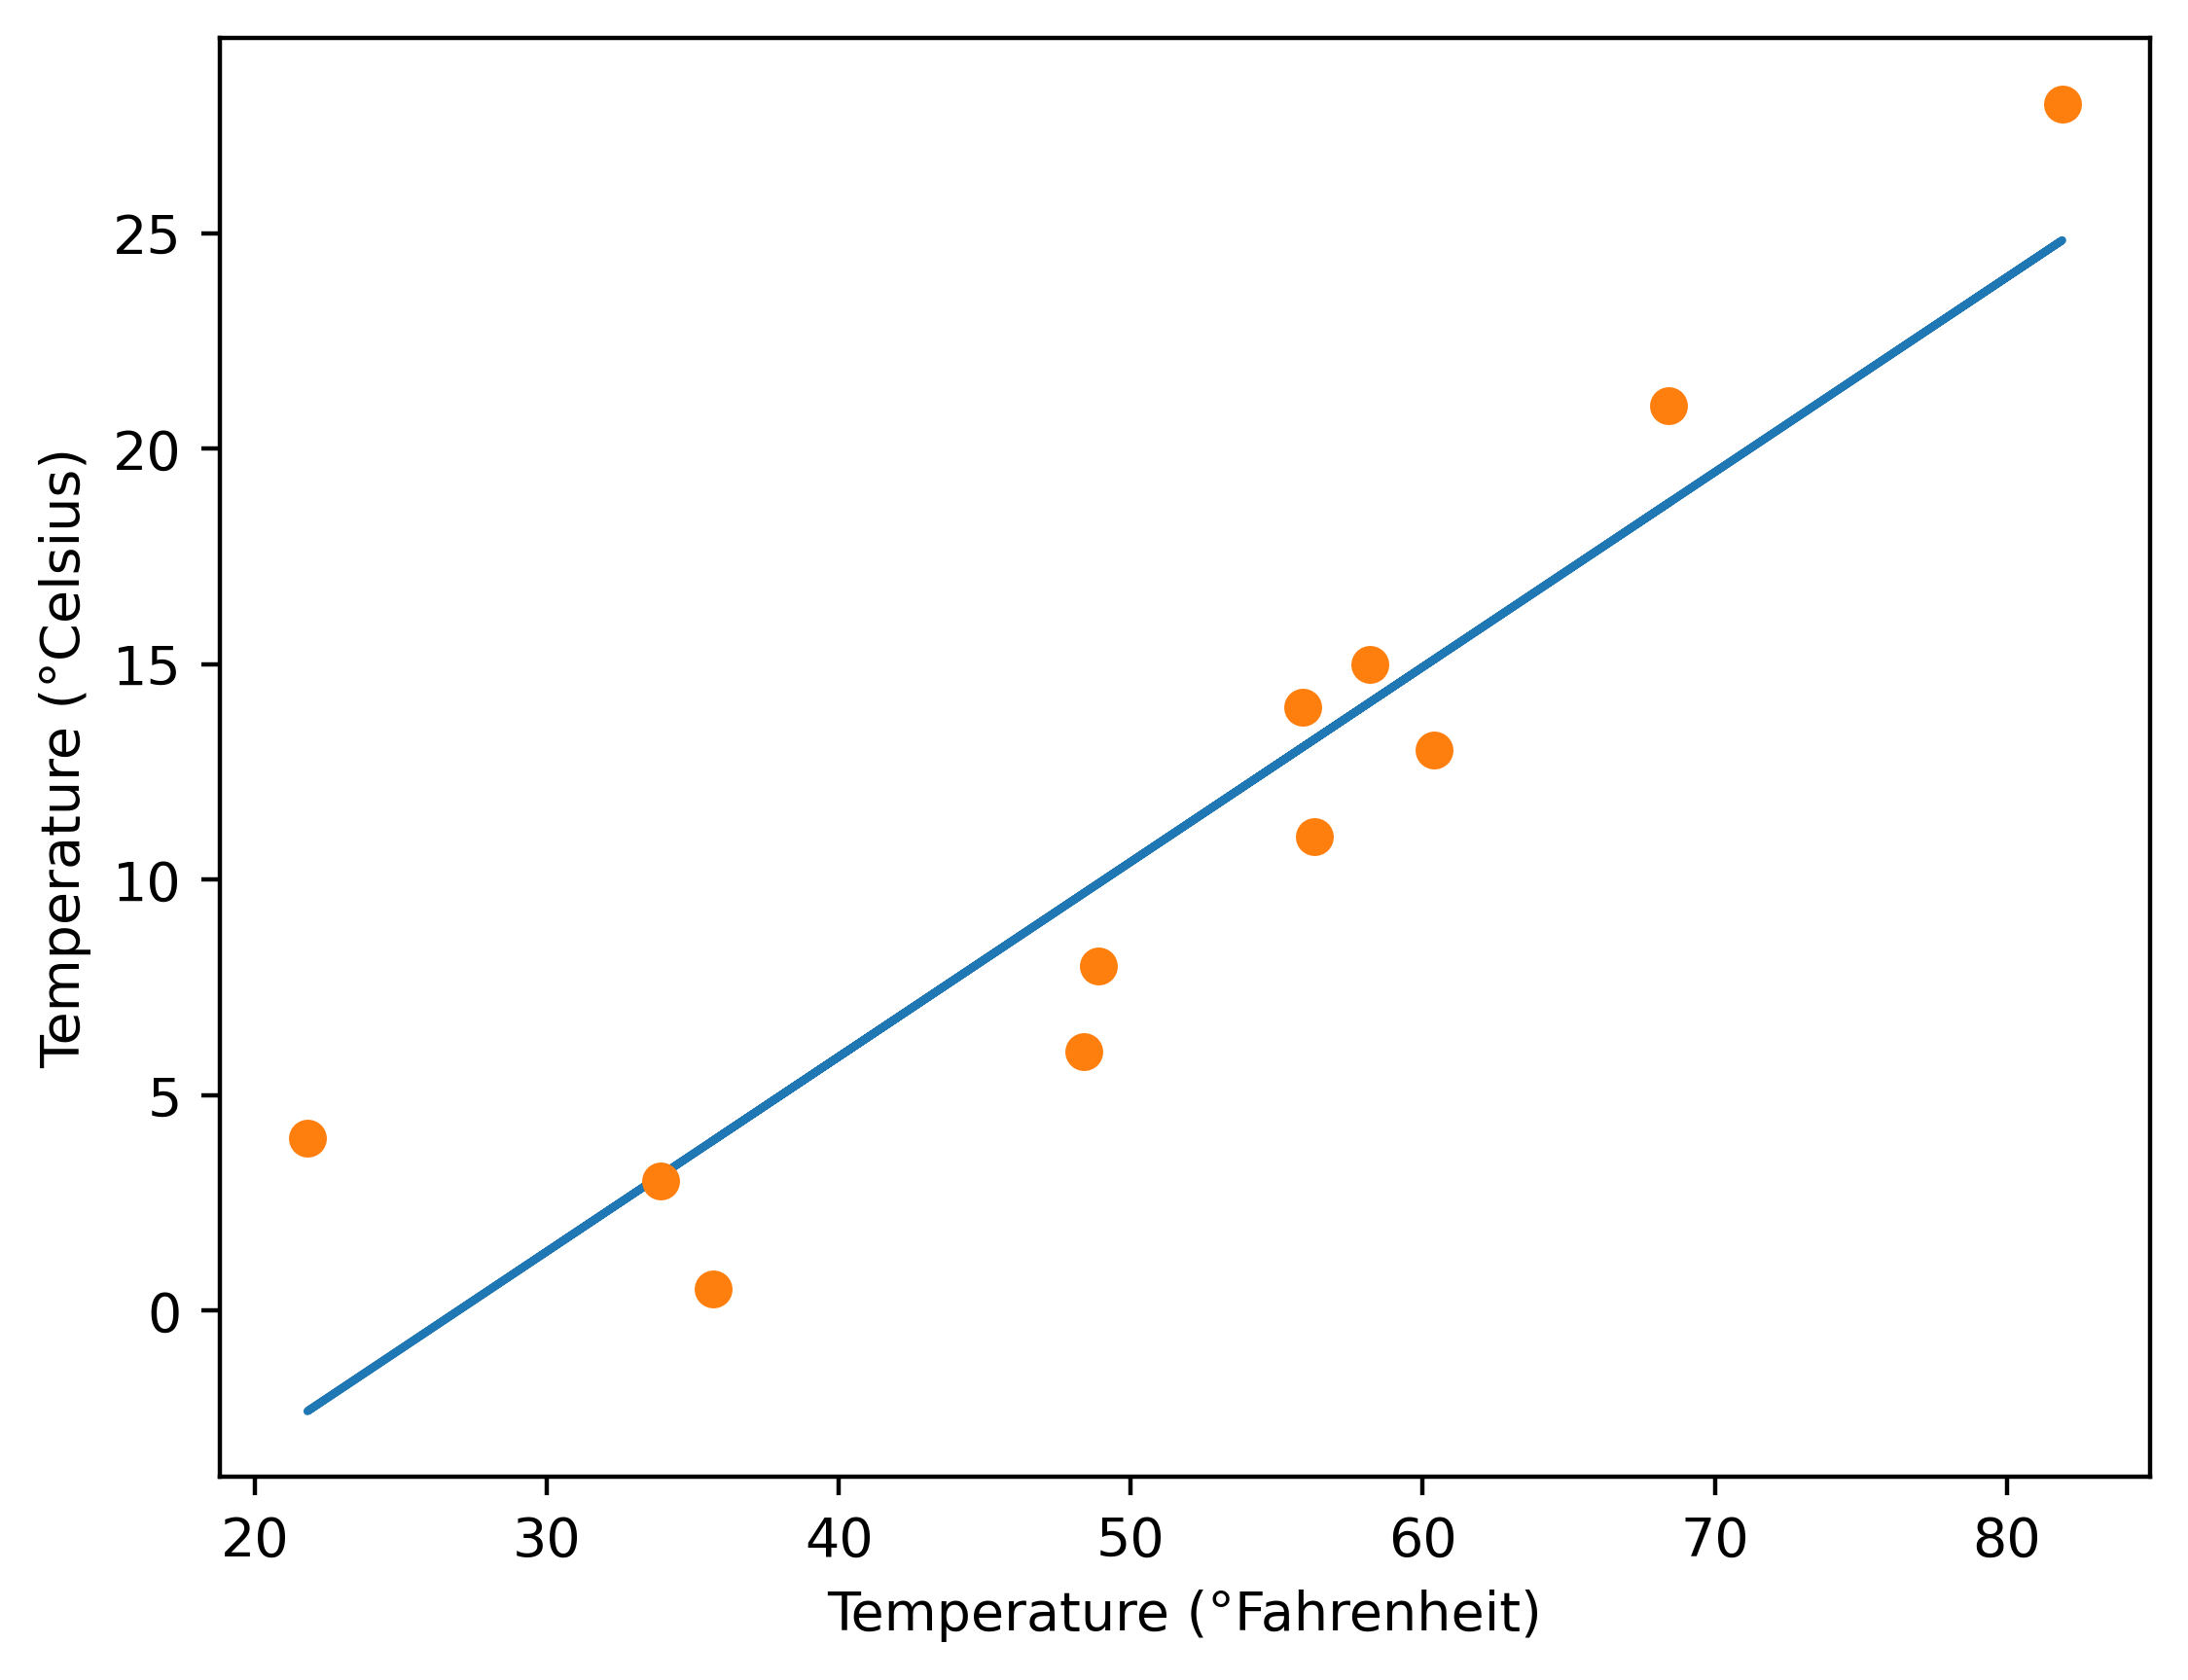

In [90]:
t_p = model(t_un, *params)
fig = plt.figure(dpi=400)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

### Использование autograd

In [92]:
params = torch.tensor([1.0, 0], requires_grad=True)

In [93]:
params.grad is None

True

In [94]:
loss = loss_fn(model(t_u, *params), t_c)

In [95]:
loss.backward()

In [96]:
params.grad

tensor([4485.5879,   81.1455])

In [99]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [100]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 11.178135
Epoch 1000, Loss 9.153041
Epoch 1500, Loss 8.783166
Epoch 2000, Loss 8.715611
Epoch 2500, Loss 8.703269
Epoch 3000, Loss 8.701015
Epoch 3500, Loss 8.700603
Epoch 4000, Loss 8.700530
Epoch 4500, Loss 8.700515
Epoch 5000, Loss 8.700512


tensor([  4.5202, -12.1869], requires_grad=True)

In [101]:
import torch.optim as optim

In [102]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

### Оптимизатор на основе градиентного спуска

In [103]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [104]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()

In [105]:
params

tensor([ 9.5514e-01, -8.1145e-04], requires_grad=True)

In [106]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [107]:
params

tensor([1.8078, 0.1209], requires_grad=True)

In [108]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [109]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [110]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 11.178135
Epoch 1000, Loss 9.153041
Epoch 1500, Loss 8.783166
Epoch 2000, Loss 8.715611
Epoch 2500, Loss 8.703269
Epoch 3000, Loss 8.701015
Epoch 3500, Loss 8.700603
Epoch 4000, Loss 8.700530
Epoch 4500, Loss 8.700515
Epoch 5000, Loss 8.700512


tensor([  4.5202, -12.1869], requires_grad=True)

In [111]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

In [112]:
training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

Epoch 500, Loss 10.824798
Epoch 1000, Loss 8.762753
Epoch 1500, Loss 8.700804
Epoch 2000, Loss 8.700513


tensor([  0.4520, -12.1882], requires_grad=True)

### Разбиение набора данных

In [114]:
n_samples = t_u.shape[0]
n_samples

11

In [120]:
n_val = int(0.2 * n_samples)
n_val

2

In [117]:
shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([ 2,  1,  7,  0,  3,  9,  4,  5, 10,  6,  8])

In [118]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [119]:
train_indices, val_indices

(tensor([ 2,  1,  7,  0,  3,  9,  4,  5, 10]), tensor([6, 8]))

In [121]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [122]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [123]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
              train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f},'
                  f'Validation loss {val_loss.item():.4f}')
    return params

In [124]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [125]:
training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 94.1811,Validation loss 0.7488
Epoch 2, Training loss 28.6573,Validation loss 14.3298
Epoch 3, Training loss 21.0330,Validation loss 27.0762
Epoch 500, Training loss 11.0644,Validation loss 17.1123
Epoch 1000, Training loss 9.3242,Validation loss 11.8782
Epoch 1500, Training loss 8.9909,Validation loss 10.1265
Epoch 2000, Training loss 8.9271,Validation loss 9.4631
Epoch 2500, Training loss 8.9148,Validation loss 9.1926
Epoch 3000, Training loss 8.9125,Validation loss 9.0780


tensor([  4.4089, -11.1527], requires_grad=True)

### Упражнение

Поменяйте модель на w2 * t_u**2 + w1 * t_u + b

In [174]:
def model_upd(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [175]:
def training_loop_upd(n_epochs, optimizer, params, train_t_u, val_t_u,
              train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_upd(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model_upd(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f},'
                  f'Validation loss {val_loss.item():.4f}')
    return params

In [178]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

In [179]:
training_loop_upd(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 742.8753,Validation loss 318.4707
Epoch 2, Training loss 398.6072,Validation loss 198.2386
Epoch 3, Training loss 215.5660,Validation loss 128.4664
Epoch 500, Training loss 6.8026,Validation loss 13.2513
Epoch 1000, Training loss 6.0941,Validation loss 11.3441
Epoch 1500, Training loss 5.5756,Validation loss 9.8495
Epoch 2000, Training loss 5.1961,Validation loss 8.6709
Epoch 2500, Training loss 4.9182,Validation loss 7.7359
Epoch 3000, Training loss 4.7146,Validation loss 6.9894


tensor([ 0.0236,  0.4109, -0.3119], requires_grad=True)